In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

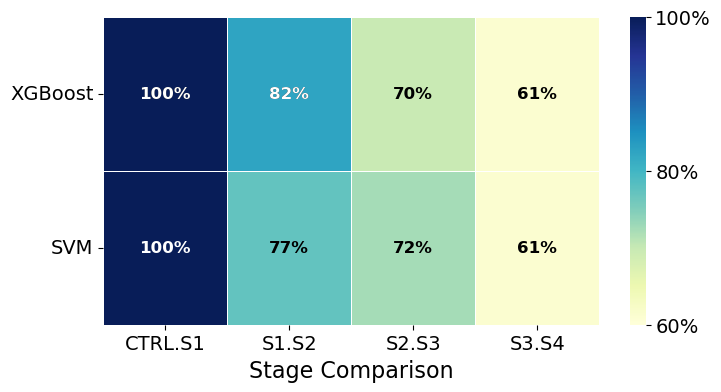

In [6]:
# Define the updated data
data = {
    "Stage Comparison": ["CTRL.S1", "S1.S2", "S2.S3", "S3.S4"],
    "XGBoost": [1.0, 0.8245614035087719, 0.6972477064220184, 0.6122448979591837],
    "SVM": [1.0, 0.7719298245614035, 0.7247706422018348, 0.6122448979591837]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Reshape the DataFrame for the heatmap
heatmap_data = df.set_index('Stage Comparison').T

# Plot the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="YlGnBu", cbar=True, linewidths=.5, linecolor='white', vmin=0.6, vmax=1.0, annot_kws={"size": 12, "weight": "bold", "color": "black"})

# Manually annotate with color adjustment based on value
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        value = heatmap_data.iloc[i, j]
        color = 'white' if value > 0.8 else 'black'
        ax.text(j + 0.5, i + 0.5, f"{value*100:.0f}%",
                ha='center', va='center', color=color, fontsize=12, weight='bold')

# Increase font sizes for ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Stage Comparison", fontsize=16)

# Set y-ticks and their labels
ax.set_yticklabels(['XGBoost', 'SVM'], rotation=0)

# Set color bar ticks and labels with larger font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_ticks([0.6, 0.80, 1.0])
cbar.set_ticklabels(['60%', '80%', '100%'])

plt.show()